This notebook tracks vortices and does an analysis by plotting the phase, circulation, and distance/angle trajectories of the vortex pairs. This has overlap with the contents of trackingv2.ipynb but makes the code more concise and more orderly. 

In [53]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from itertools import combinations 

from PointTracking_v2 import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe

Start with 250000 time steps because thats where the vortices mostly move away from each other. 

Total Imag Time:  1.3102059364318848
kmax:  4.0212385965949355
T:  0.0
(401, 128, 128)
(1, 128, 128)


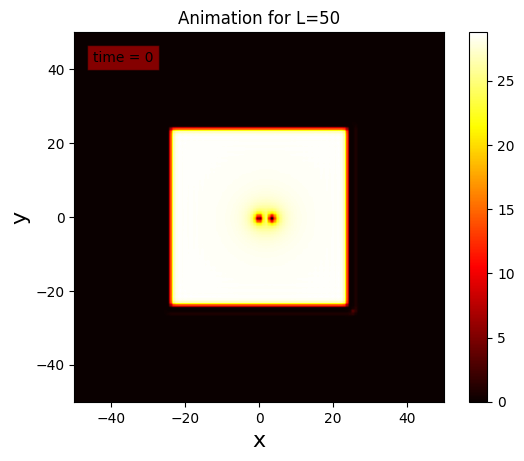

In [54]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 100000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 0, dst = False, vortex = True)

Initialize the tracker

In [55]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)

In [56]:
v_traj, antiv_traj, circ_array = pt.labelVortices(tracker, getCirc = True) 

In [57]:
# convert the lists into arrays 

v_traj_arr = np.array(v_traj) 
antiv_traj_arr = np.array(antiv_traj) 

In [58]:
# distance 
vortex_combos = np.array(list(combinations(antiv_traj_arr, 2))) # specifically for the antivortex case.... lacking for the vortex/antivortex pair case... 

distance_arr = np.zeros((len(vortex_combos), len(g.snaps)))
angle_arr = np.zeros((len(vortex_combos), len(g.snaps))) 

for i, pair in enumerate(vortex_combos): # for each pair - find the distance 
    for j in range(len(vortex_combos[0][0])): 
    #for j in range(280,290):
 
        
        point1 = pair[0][j] 
        point2 = pair[1][j] 
        xsep = point1[0] - point2[0] 
        ysep = point1[1] - point2[1] 
        dist = np.sqrt(np.abs(point1[0] - point2[0])**2 + np.abs(point1[1] - point2[1])**2) 
        ang = np.arctan(ysep/xsep) 

        distance_arr[i,j] = dist 
        angle_arr[i,j] = ang


C:\Users\TQC User\AppData\Local\Temp\ipykernel_25644\210420921.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  ang = np.arctan(ysep/xsep)


In [59]:
print(np.shape(distance_arr))

(1, 401)


Text(0.5, 1.0, 'Distance between vortices')

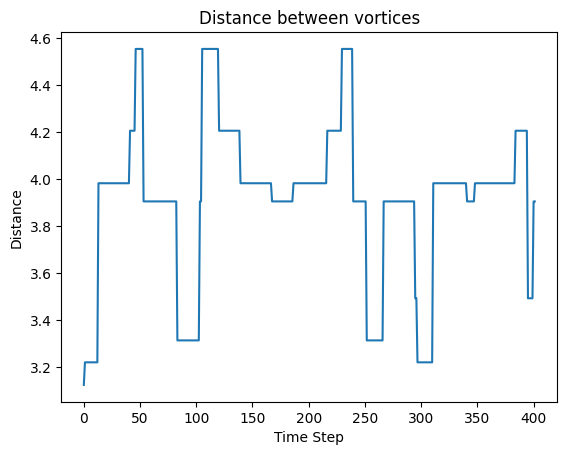

In [62]:
plt.figure() 
 
plt.plot(np.linspace(0,len(distance_arr[0]), len(distance_arr[0])), distance_arr[0])
plt.xlabel('Time Step')
plt.ylabel('Distance') 
plt.title('Distance between vortices')

Text(0.5, 1.0, 'Angle between vortices')

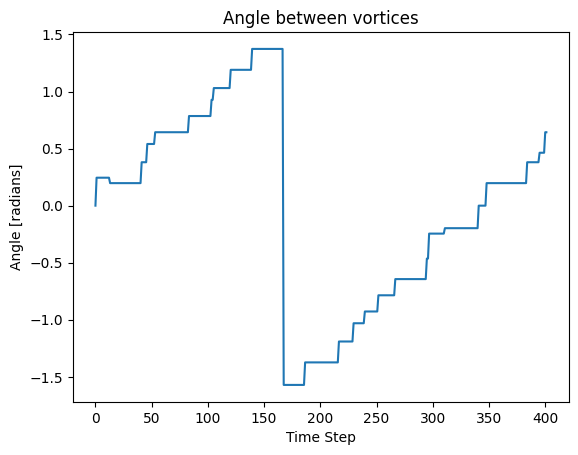

In [63]:
plt.figure() 

plt.plot(np.linspace(0,len(angle_arr[0]), len(angle_arr[0])), angle_arr[0])


plt.xlabel('Time Step')
plt.ylabel('Angle [radians]') 
plt.title('Angle between vortices')

In [64]:
def animatepsi2(filename): 
    time_tracking = np.arange(0, len(g.snaps))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    data = plt.imshow(np.abs(g.snaps[0])**2, extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = plt.cm.hot, origin = 'lower')
    plt.colorbar() 
    L = g.L

    # avi_traj1 = antiv_traj_arr[0] # the trajecory of the ith antivortex 
    # v1 = plt.scatter(avi_traj1[0][0]+0.5-L/2, avi_traj1[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')

    # avi_traj2 = antiv_traj_arr[1] # the trajecory of the ith antivortex 
    # v2 = plt.scatter(avi_traj2[0][0]+0.5-L/2, avi_traj2[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')


    # try storing in an array 
    vort_arr = [] 
    
    for i in range(len(antiv_traj_arr)): 
         avi_traj = antiv_traj_arr[i] 
         v = plt.scatter(avi_traj[0][0]+0.5-L/2, avi_traj[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')
         vort_arr.append(v) 
    ### 
    # v1 = vort_arr[0]
    # v2 = vort_arr[1]


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(np.abs(g.snaps[i])**2)
        # loop over the existing points 
        #print(vort_arr[0])
        #v1.set_offsets([antiv_traj_arr[0][i][0]+0.5-L/2, antiv_traj_arr[0][i][1]+0.5-L/2])
        #v2.set_offsets([antiv_traj_arr[1][i][0]+0.5-L/2, antiv_traj_arr[1][i][1]+0.5-L/2])

        for j in range(len(vort_arr)): 
             vort_arr[j].set_offsets([antiv_traj_arr[j][i][0]+0.5-L/2, antiv_traj_arr[j][i][1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
        #return data, time_text

        #vort_arr = [v1,v2]
        return data, time_text, *vort_arr
    anim = animation.FuncAnimation(fig, animate, frames = len(g.snaps), blit = True)
    anim.save(path)
    plt.show() 

    return anim 
    

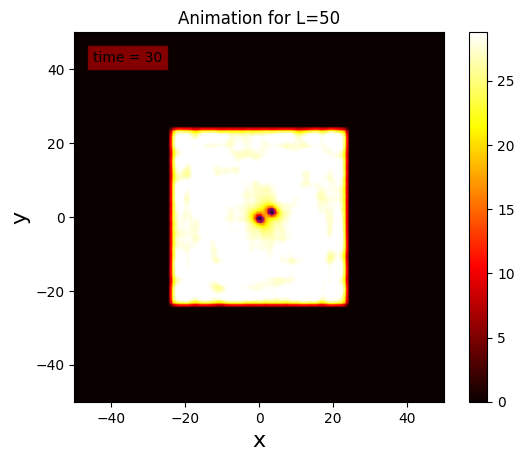

In [68]:
animatepsi2('testvortices.mp4')

In [65]:
# try with just two vortices 

def generalAnimation(filename, dataset, periodic = False): 
    time_tracking = np.arange(0, len(dataset))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    if not periodic: 
        data = plt.imshow(dataset[0],  extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], origin = 'lower')
    else: 
        data = plt.imshow(dataset[0], extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = 'twilight', origin = 'lower')
    plt.colorbar() 
    plt.clim(-2*np.pi, 2*np.pi)

     
    L = g.L

    # avi_traj1 = antiv_traj_arr[0] # the trajecory of the ith antivortex 
    # v1 = plt.scatter(avi_traj1[0][0]+0.5-L/2, avi_traj1[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')

    # avi_traj2 = antiv_traj_arr[1] # the trajecory of the ith antivortex 
    # v2 = plt.scatter(avi_traj2[0][0]+0.5-L/2, avi_traj2[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')


    # try storing in an array 
#     vort_arr = [] 
    
#     for i in range(len(antiv_traj_arr)): 
#          avi_traj = antiv_traj_arr[i] 
#          v = plt.scatter(avi_traj[0][0]+0.5-L/2, avi_traj[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')
#          vort_arr.append(v) 
    ### 
    # v1 = vort_arr[0]
    # v2 = vort_arr[1]


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(dataset[i])


     #    for j in range(len(vort_arr)): 
     #         vort_arr[j].set_offsets([antiv_traj_arr[j][i][0]+0.5-L/2, antiv_traj_arr[j][i][1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
        #return data, time_text

        #vort_arr = [v1,v2]
        return data, time_text
    anim = animation.FuncAnimation(fig, animate, frames = len(dataset), blit = True)
    anim.save(path)
    
    plt.show() 

    return anim 
    

In [69]:
# analyze the plots by overlaying the vortex coordinates on top of the circulation plot 
def combinedAnim(filename, dataset, snaps, periodic = False): 

    time_tracking = np.arange(0, len(dataset))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    if not periodic: 
        data = plt.imshow(dataset[0],  extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], origin = 'lower')
    else: 
        data = plt.imshow(dataset[0], extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = 'twilight', origin = 'lower')
    plt.colorbar() 
    plt.clim(-2*np.pi, 2*np.pi)

     
    L = g.L
    vort_arr = [] 
    
    for i in range(len(antiv_traj_arr)): 
         avi_traj = antiv_traj_arr[i] 
         v = plt.scatter(avi_traj[0][0]+0.5-L/2, avi_traj[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')
         vort_arr.append(v)


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(dataset[i])
        for j in range(len(vort_arr)): 
             vort_arr[j].set_offsets([antiv_traj_arr[j][i][0]+0.5-L/2, antiv_traj_arr[j][i][1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
        #return data, time_text

        #vort_arr = [v1,v2]
        return data, time_text, *vort_arr
    anim = animation.FuncAnimation(fig, animate, frames = len(dataset), blit = True)
    anim.save(path)
    
    plt.show() 

    return anim 
    

KeyboardInterrupt: 

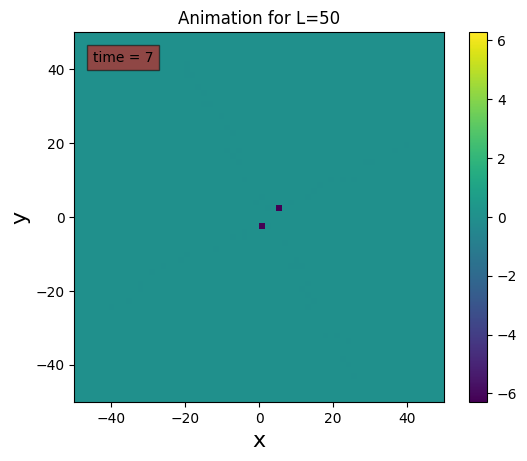

In [70]:
generalAnimation('circ5.mp4', circ_array)

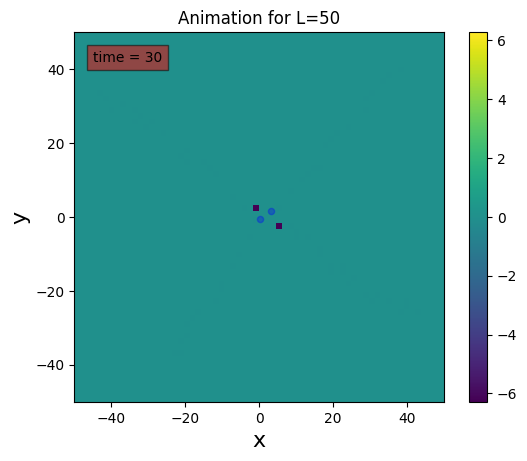

In [71]:
combinedAnim("circandtracking.mp4", circ_array, g.snaps)

In [27]:
# Animating the Phase 
phase = [] 
for snap in range(len(g.snaps)): 
    phase.append(np.angle(g.snaps[snap][int(g.L/2/g.dx):int(3*g.L/2/g.dx), int(g.L/2/g.dx): int(3*g.L/2/g.dx)]))
phase_arr = np.array(phase)

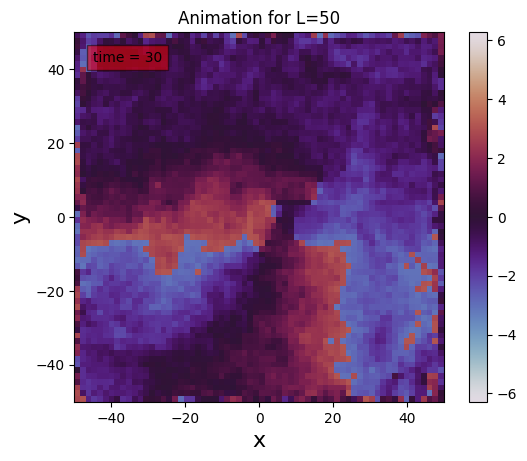

In [28]:
generalAnimation('phase3.mp4', phase_arr, periodic = True)